# The Spark Foundation Network

# Task#5 Exploratory Data Analysis - Sport
## Perform 'Exporatory Data Analysis' on dataset of 'India Premier League'


# Author: Muhammad Hassan

## language: Python
## IDE: Google Colab



## Questions and Answer

Questions:
How many matches we’ve got in the dataset?

How many seasons we’ve got in the dataset?

Which Team had won by maximum runs?

Which Team had won by maximum wicket?

Which Team had won by closest Margin (minimum runs)?

Which Team had won by minimum wicket?

Which Season had most number of matches?

Which IPL Team is more successful?

Has Toss-winning helped in winning matches?

In [1]:
#pull from GoogleDrive

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# google file link: "https://drive.google.com/file/d/1T64Ws6fmiKAHA0mJ6QfRzSVOpWvS14Br/view?usp=sharing"
id = '1T64Ws6fmiKAHA0mJ6QfRzSVOpWvS14Br'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('matches.csv') 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
%matplotlib inline

In [4]:
matches = pd.read_csv('matches.csv')
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [5]:
# Get Number of Col & Rows
matches.shape

(636, 18)

In [6]:
#file layout
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
#get basic statistics
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [8]:
#review few rows
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [9]:
# Q1: How many matches we've got in the dataset?
matches['id'].max()

636

In [10]:
# Q2a: How many seasons we've got in the dataset?
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [11]:
# Q2b: How many seasons we've got in the dataset?
len(matches['season'].unique())

10

In [12]:
matches['season'].min()

2008

In [13]:
#Q3: Which Team had won by maximum runs?
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [14]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']
# how to get multiple colums?

'Mumbai Indians'

In [15]:
#Q4: Which Team had won by maximum wickets?
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [16]:
matches.iloc[matches['win_by_wickets'].idxmax()]['season']

2017

In [17]:
#Q5: Which Team had won by (closet margin) minimum runs?
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [18]:
#Q6: Which Team had won by minimum wickets?
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

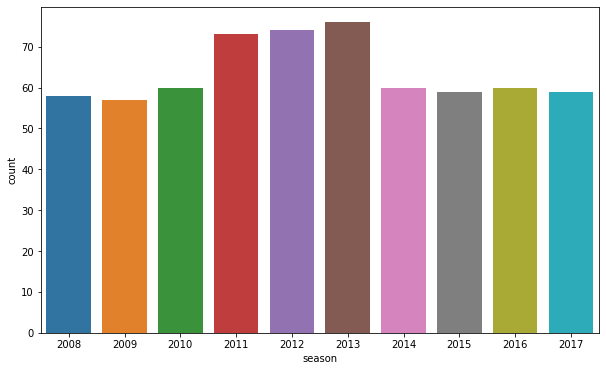

In [19]:
#Q7: Which season had most number of matches?
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches)
plt.show()

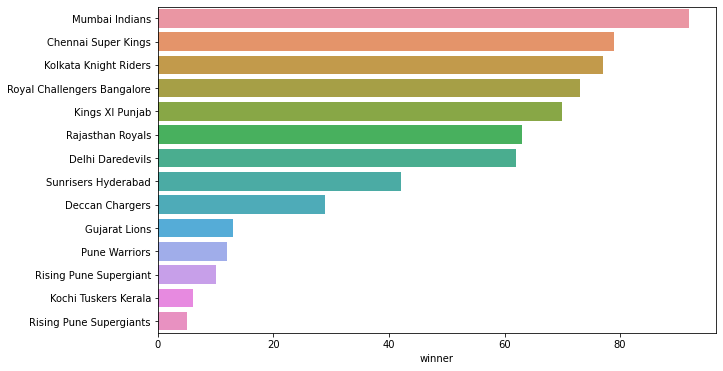

In [20]:
#Q8: The most successful IPL Team
data = matches.winner.value_counts()
plt.figure(figsize=(10,6))
# data --> making a new data frame
# matches.winner --> value_counts()
sns.barplot(y = data.index, x = data, orient='h');


In [21]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [33]:
#Q8b: Which umpire has officiated the most number of IPL matches on-field?
umpire1_ser = matches['umpire1'].value_counts()
umpire2_ser = matches['umpire2'].value_counts()

print("The Most number of IPL matches on filed by Empires")
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df


The Most number of IPL matches on filed by Empires


,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
BF Bowden,37.0,NaN
S Ravi,36.0,49.0
BR Doctrove,34.0,8.0
M Erasmus,32.0,22.0
RE Koertzen,20.0,21.0
S Asnani,19.0,11.0


In [23]:
matches.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

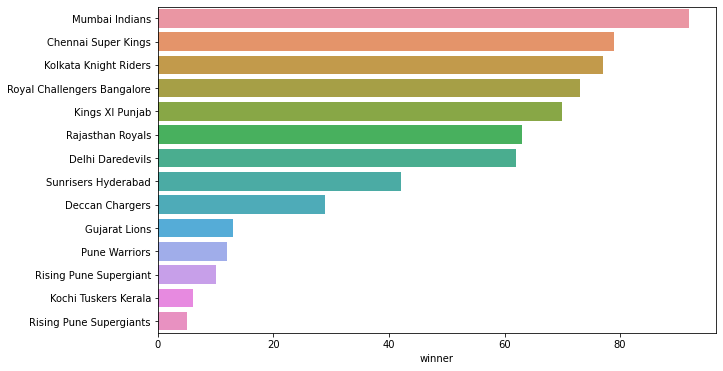

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(y = data.index, x = data, orient='h');

## Top players of the match Winners

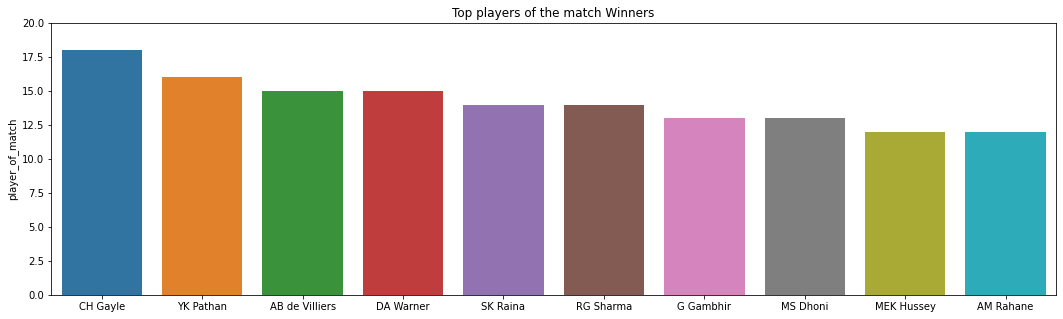

In [26]:
#Q9: Top players of the match Winners
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(18,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top players of the match Winners")

sns.barplot( x = top_players.index, y = top_players, orient='v');
plt.show()

In [27]:
top_players = matches.player_of_match.value_counts()[:10]
top_players

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64

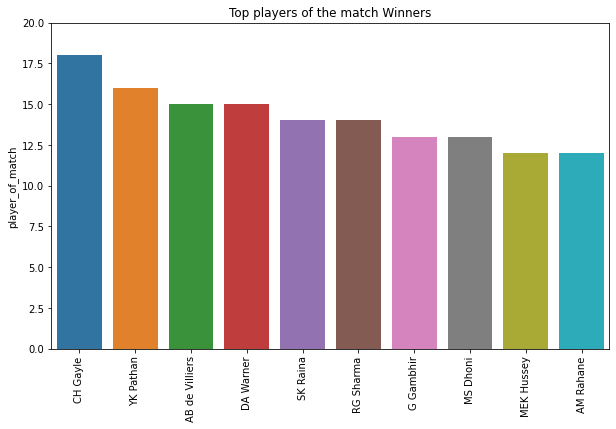

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top players of the match Winners")
plt.xticks(rotation=90)
sns.barplot( x = top_players.index, y = top_players, orient='v');
plt.show()

In [29]:
# Q10: Has Toss-winning helped in Match-winning?
ss = matches["toss_winner"] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


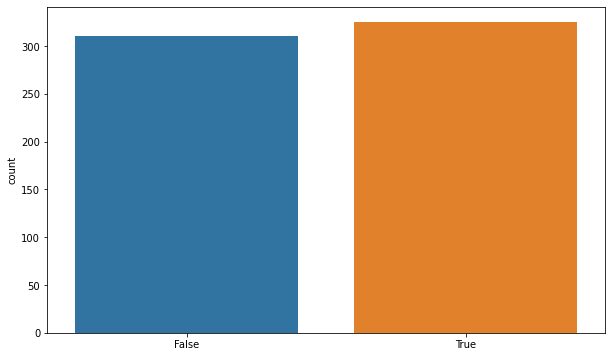

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(ss);
